In [1179]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import seaborn as sns

hakemisto = './data/'

sisalto = os.listdir(hakemisto)
print(sisalto)

# Ladataan data 
df_train = pd.read_csv('./data/Tampere_BNB_training_listing.csv')
df_test = pd.read_csv('./data/Tampere_BNB_testing_listing.csv')

['Global_Landslide_Catalog_Export.csv:Zone.Identifier', 'Tampere_BNB_testing_listing.csv', 'Global_Landslide_Catalog_Export.csv', 'Tampere_BNB_training_listing.csv', 'Tampere_BNB_training_listing.csv:Zone.Identifier', 'Tampere_BNB_testing_listing.csv:Zone.Identifier', 'catalog.csv:Zone.Identifier', 'NFL Play by Play 2009-2016 (v3).csv', 'catalog.csv', 'Building_Permits.csv:Zone.Identifier', 'NFL Play by Play 2009-2016 (v3).csv:Zone.Identifier', 'Building_Permits.csv']


In [1180]:
df_train.describe()


,m2,Rv,Pituusaste,Leveysaste,Hinta
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,60.947870,1990.896296,23.796642,61.485415,283.833333
std,28.571568,26.501165,0.102356,0.026275,140.907735
min,12.000000,1880.000000,23.581308,61.430235,36.000000
25%,40.500000,1970.000000,23.730274,61.466342,192.000000
50%,56.500000,1990.000000,23.793908,61.493092,255.000000
75%,75.000000,2018.000000,23.854114,61.501942,339.000000
max,259.000000,2024.000000,24.070784,61.627915,1299.000000


In [1181]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kaupunginosa    1080 non-null   object 
 1   Huoneisto       1080 non-null   object 
 2   Talot.          1080 non-null   object 
 3   m2              1080 non-null   float64
 4   Rv              1080 non-null   int64  
 5   Krs             1018 non-null   object 
 6   Hissi           1080 non-null   object 
 7   Kunto           786 non-null    object 
 8   Asunnon tyyppi  1080 non-null   object 
 9   Pituusaste      1080 non-null   float64
 10  Leveysaste      1080 non-null   float64
 11  Hinta           1080 non-null   int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 101.4+ KB


In [1182]:
df_train.head(1000)

,Kaupunginosa,Huoneisto,Talot.,m2,Rv,Krs,Hissi,Kunto,Asunnon tyyppi,Pituusaste,Leveysaste,Hinta
0,Niemenranta,"2h , kt, s, p",kt,50.0,2020,2/6,on,hyvä,Kaksi huonetta,23.696606,61.524269,300
1,Vuores,1 H + KT,kt,28.0,2018,1/4,on,hyvä,Yksiö,23.804092,61.433185,162
2,Niemenranta,"3 h , kt , s, p",kt,63.0,2020,3/6,on,hyvä,Kolme huonetta,23.696636,61.519368,363
3,Keskusta,3h+k+vh+kph/wc+...,kt,84.0,1964,5/7,on,NaN,Kolme huonetta,24.062369,61.463896,483
4,Hervanta,"2 h, kk, s, ph, p",kt,52.0,1995,6/6,on,tyyd.,Kaksi huonetta,23.848751,61.446601,174
5,Kaleva,3h+k+et+kph/wc+...,kt,56.0,1958,4/4,ei,NaN,Kolme huonetta,23.806857,61.498845,276
6,Takahuhti,"2h, kt",kt,40.0,2022,2/6,on,NaN,Kaksi huonetta,23.858188,61.499247,246
7,Kaleva,1h+kt+kph+lasit...,kt,23.5,2022,7/13,ei,hyvä,Yksiö,23.806872,61.499177,231
8,Kämmenniemi,"2h,k,s",rt,45.0,1989,1/1,ei,hyvä,Kaksi huonetta,23.837523,61.625291,165
9,Ratina,1h+kk,kt,38.0,2011,4/5,on,NaN,Yksiö,23.765501,61.493427,309


In [1183]:
puuttuvat_arvot = df_train.isnull().sum()
puuttuvat_arvot = puuttuvat_arvot[puuttuvat_arvot > 0]
print(f"Puuttuvat arvot:\n {puuttuvat_arvot}")

Puuttuvat arvot:
 Krs       62
Kunto    294
dtype: int64


In [1184]:
puuttuvat_arvot_prosentteina = (puuttuvat_arvot / len(df_train)) * 100
print(f"Puuttuvat arvot prosentteina:\n {puuttuvat_arvot_prosentteina}")

Puuttuvat arvot prosentteina:
 Krs       5.740741
Kunto    27.222222
dtype: float64


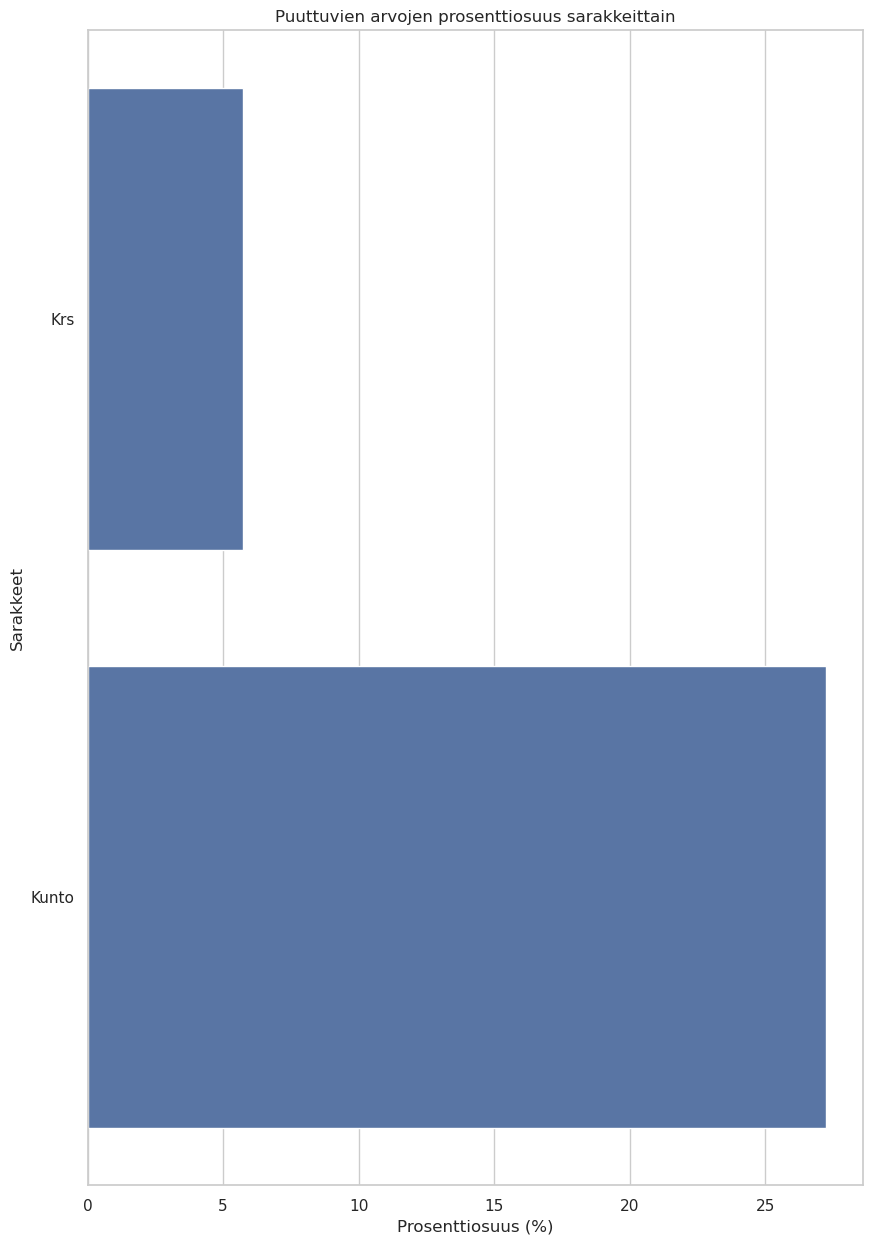

In [1185]:
puuttuvat_arvot_prosentteina = puuttuvat_arvot_prosentteina.sort_values() # Järjestellään kasvavaan järjestykseen

# Visualisointi 
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 15))  # Säädä kokoa tarpeen mukaan
sns.barplot(x=puuttuvat_arvot_prosentteina, y=puuttuvat_arvot_prosentteina.index)
plt.title('Puuttuvien arvojen prosenttiosuus sarakkeittain')
plt.xlabel('Prosenttiosuus (%)')
plt.ylabel('Sarakkeet')
plt.show()

In [1186]:
# Muutetaan Rv sarakkeen tyyppi kokonaisluvuksi
df_train['Rv'] = df_train['Rv'].astype(int)

In [1187]:
df_train['Rv'].head(10)

0    2020
1    2018
2    2020
3    1964
4    1995
5    1958
6    2022
7    2022
8    1989
9    2011
Name: Rv, dtype: int64

<Axes: xlabel='Rv'>

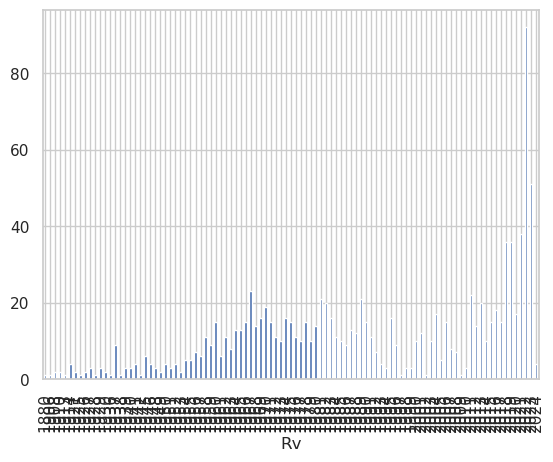

In [1188]:
df_train['Rv'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='Kunto'>

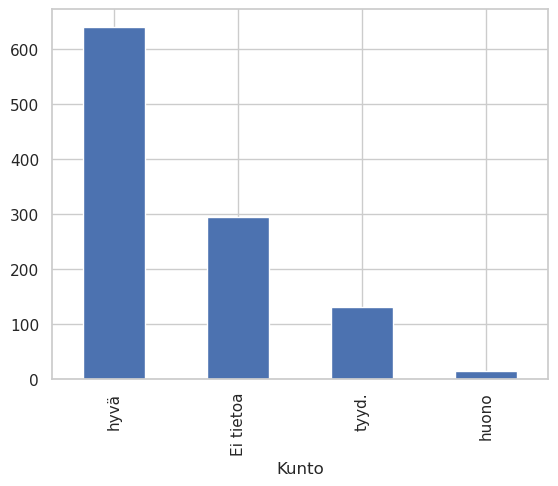

In [1189]:
df_train['Kunto'] = df_train['Kunto'].fillna('Ei tietoa')
df_train['Kunto'].value_counts().plot(kind='bar')

In [1190]:
kunto_mappaus = {
    'Ei tietoa': 0,
    'huono': 1,
    'tyyd.': 2,
    'hyvä': 3,
}
df_train['Kunto'] = df_train['Kunto'].map(kunto_mappaus)
df_train.head(10)

,Kaupunginosa,Huoneisto,Talot.,m2,Rv,Krs,Hissi,Kunto,Asunnon tyyppi,Pituusaste,Leveysaste,Hinta
0,Niemenranta,"2h , kt, s, p",kt,50.0,2020,2/6,on,3,Kaksi huonetta,23.696606,61.524269,300
1,Vuores,1 H + KT,kt,28.0,2018,1/4,on,3,Yksiö,23.804092,61.433185,162
2,Niemenranta,"3 h , kt , s, p",kt,63.0,2020,3/6,on,3,Kolme huonetta,23.696636,61.519368,363
3,Keskusta,3h+k+vh+kph/wc+...,kt,84.0,1964,5/7,on,0,Kolme huonetta,24.062369,61.463896,483
4,Hervanta,"2 h, kk, s, ph, p",kt,52.0,1995,6/6,on,2,Kaksi huonetta,23.848751,61.446601,174
5,Kaleva,3h+k+et+kph/wc+...,kt,56.0,1958,4/4,ei,0,Kolme huonetta,23.806857,61.498845,276
6,Takahuhti,"2h, kt",kt,40.0,2022,2/6,on,0,Kaksi huonetta,23.858188,61.499247,246
7,Kaleva,1h+kt+kph+lasit...,kt,23.5,2022,7/13,ei,3,Yksiö,23.806872,61.499177,231
8,Kämmenniemi,"2h,k,s",rt,45.0,1989,1/1,ei,3,Kaksi huonetta,23.837523,61.625291,165
9,Ratina,1h+kk,kt,38.0,2011,4/5,on,0,Yksiö,23.765501,61.493427,309


In [1191]:
df_train['Kunto'].value_counts()   

Kunto
3    641
0    294
2    130
1     15
Name: count, dtype: int64

In [1192]:
df_train['Hissi'].value_counts()


Hissi
on    683
ei    397
Name: count, dtype: int64

In [1193]:
df_train['Hissi'] = df_train['Hissi'].astype('category')
df_train['Hissi'] = df_train['Hissi'].cat.codes
df_train['Hissi'].value_counts()

Hissi
1    683
0    397
Name: count, dtype: int64

In [1194]:
pd.set_option('display.max_row', None) 
df_train['Kaupunginosa'].value_counts()

Kaupunginosa
Hervanta          73
Kaleva            62
Tammela           59
Hervantajärvi     54
Keskusta          50
Vuores            43
Pyynikki          37
Hatanpää          35
Tesoma            34
Linnainmaa        28
Amuri             28
Lentävänniemi     26
Annala            25
Härmälänranta     22
Niemenranta       21
Ratina            19
Kaukajärvi        17
Peltolammi        17
Rahola            16
Atala             15
Kalkku            14
Härmälä           13
Haapalinna        13
Tampella          12
Takahuhti         12
Pispala           12
Multisilta        12
Janka             12
Nekala            11
Tasanne           11
Olkahinen         11
Ikuri             11
Leinola           10
Vehmainen          9
Hakametsä          9
Rantaperkiö        9
Hyhky              9
Ruotula            8
Koivistonkylä      8
Hämeenpuisto       8
Ryydynpohja        7
Pappila            7
Armonkallio        7
Kaakinmaa          7
Järvensivu         7
Kissanmaa          6
Hallila            6


<Axes: xlabel='Kaupunginosa'>

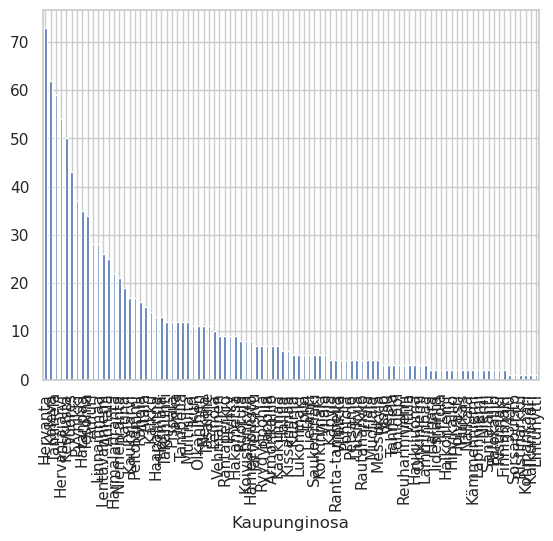

In [1195]:
df_train['Kaupunginosa'] = df_train['Kaupunginosa'].astype('category')   
df_train['Kaupunginosa'].value_counts().plot(kind='bar') 


/tmp/ipykernel_136368/1405857891.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_train['Kaupunginosa'] = df_train['Kaupunginosa'].replace(pienet_ryhmat, 'Muu')


<Axes: xlabel='Kaupunginosa'>

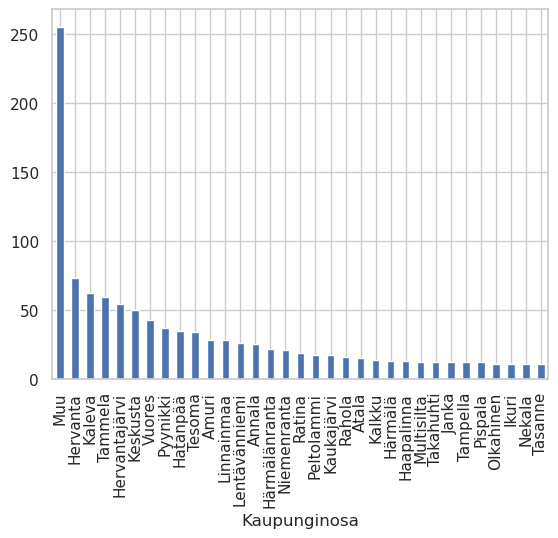

In [1196]:
raja_arvo = 0.01
maarat = df_train['Kaupunginosa'].value_counts(normalize=True)
pienet_ryhmat = maarat[maarat < raja_arvo].index
df_train['Kaupunginosa'] = df_train['Kaupunginosa'].replace(pienet_ryhmat, 'Muu')
df_train['Kaupunginosa'].value_counts().plot(kind='bar')

In [1197]:
df_train['Kaupunginosa'].value_counts()

Kaupunginosa
Muu              255
Hervanta          73
Kaleva            62
Tammela           59
Hervantajärvi     54
Keskusta          50
Vuores            43
Pyynikki          37
Hatanpää          35
Tesoma            34
Amuri             28
Linnainmaa        28
Lentävänniemi     26
Annala            25
Härmälänranta     22
Niemenranta       21
Ratina            19
Peltolammi        17
Kaukajärvi        17
Rahola            16
Atala             15
Kalkku            14
Härmälä           13
Haapalinna        13
Multisilta        12
Takahuhti         12
Janka             12
Tampella          12
Pispala           12
Olkahinen         11
Ikuri             11
Nekala            11
Tasanne           11
Name: count, dtype: int64

In [1198]:
df_train['Kaupunginosa'] = df_train['Kaupunginosa'].astype('category')
df_train['Kaupunginosa'] = df_train['Kaupunginosa'].cat.codes
df_train['Kaupunginosa'].value_counts()

Kaupunginosa
0     255
6      73
12     62
28     59
7      54
15     50
32     43
24     37
5      35
31     34
17     28
1      28
16     26
2      25
9      22
20     21
26     19
22     17
14     17
25     16
3      15
13     14
8      13
4      13
27     12
11     12
29     12
18     12
23     12
10     11
19     11
21     11
30     11
Name: count, dtype: int64

In [1199]:
df_train['Asunnon tyyppi'].value_counts()

Asunnon tyyppi
Kaksi huonetta                463
Kolme huonetta                262
Yksiö                         204
Neljä huonetta tai enemmän    151
Name: count, dtype: int64

In [1200]:
tyyppimat = {
    'Yksiö' : 1,
    'Kaksi huonetta' : 2,
    'Kolme huonetta' : 3,
    'Neljä huonetta tai enemmän' : 4
}
df_train['Asunnon tyyppi'] = df_train['Asunnon tyyppi'].map(tyyppimat)
df_train['Asunnon tyyppi'].value_counts()

Asunnon tyyppi
2    463
3    262
1    204
4    151
Name: count, dtype: int64

In [1201]:
df_train['Huoneisto'].value_counts()

Huoneisto
2h, kt                34
2h+k                  20
3h, k, s              19
1h, kt                15
3h+k+s                14
2h+k+s                13
2h, k, kph, s, ...    12
3h, kt, s             12
2h,k,s                12
2h+kk                 11
2h, k, kph, vh,...    10
4h, k, s               9
1h+kt+kph+lasit...     9
2h, k                  8
2h, k, kph/wc, ...     8
1h, kt, alk            8
3h, k, kph, s, ...     8
1h, kk                 7
4h+k+s                 7
1h, kt, kph, rp        7
2h, k, p               6
2h, k, s               6
1h, k                  6
2h,k                   6
2h,k,p                 5
2h+kk+s                5
3h,k                   5
2h, kt, s, parv...     5
1h+kk                  5
3h+k                   5
1h+k                   5
2h+kt+kph+lasit...     5
3h,k,s                 5
1h, kk, kph            5
3h, k, vh, kph/...     5
2h, kk                 4
1H+KT                  4
4h,k,s                 4
2h+k+kph+s+lasit.p     4
2h, k, kph/s, w

In [1202]:
df_train['Huoneisto'] = df_train['Huoneisto'].str.lower()
df_train['Huoneisto'] = df_train['Huoneisto'].str.replace(' ', '')
df_train['Huoneisto'] = df_train['Huoneisto'].str.replace('+', ',')
df_train['Huoneisto'] = df_train['Huoneisto'].str.replace('...', "")
df_train['Huoneisto'].value_counts()


Huoneisto
3h,k,s                39
2h,kt                 37
2h,k                  35
2h,k,s                34
1h,kt                 26
4h,k,s                21
2h,kk                 17
2h,k,p                16
3h,kt,s               15
1h,k                  15
1h,kk                 15
3h,k                  14
2h,k,kph,s,           12
2h,k,s,p              11
2h,k,kph,vh,          10
1h,kt,kph,lasit        9
2h,kk,s                9
1h,kt,alk              8
2h,k,kph/wc,           8
3h,k,kph,s,            8
1h,kt,kph,rp           7
2h,kk,kph              7
3h,k,s,p               6
2h,k,kph,p             6
2h,kt,kph,lasit        6
2h,kt,s,parv           5
3h,k,vh,kph/           5
1h,kk,kph              5
2h,kt,s                5
3h,k,p                 5
1h,k,kph               4
2h,avokeitti          4
2h,k,kph               4
2h,kk,s,p              4
2h,k,kph,s,lasit.p     4
1h,kt,kph,parvi        4
1h,kt,kph,la           4
2h,k,kph/wc            4
4h,k,p                 4
2h,k,kph,vh,p  

In [1203]:
df_train['Huoneisto'] = df_train['Huoneisto'].str.replace('/', ',')
df_train['Huoneisto'] = df_train['Huoneisto'].str.replace('[0-9]+h', '', regex=True)
df_train['Huoneisto'].value_counts()

Huoneisto
,k,s                96
,k                  66
,kt                 63
,kk                 33
,k,p                26
,k,kph,s,           26
,kt,s               23
,k,s,p              17
,k,kph,wc,          16
,kt,kph,lasit       15
,kk,s               13
,k,kph,vh,          12
,kk,kph             12
,k,kph,p            10
,k,kph              10
,k,vh,kph,          10
,k,kph,wc            9
,kt,alk              8
,k,rt,kph,           7
,kt,s,parv           7
,kt,kph,rp           7
,k,s,las.parv.       6
,k,kph,s,eril        5
,k,wc,kph,           5
,avokeitti&#         5
,kt,lasitet          5
,k,kph,vh,p          5
,k,kph,s,khh,        5
,kt,p                4
,k,lasitett          4
,k,rt,s,p            4
4-,kt,2xkp           4
,k,kph,vh,las        4
,k,lasitettu         4
,kk,s,p              4
,kt,kph,la           4
,kt,s,p              4
,kt,parveke          4
,kk,kph,wc,          4
,kt,kh,wc,           4
,k,kph,s,w           4
,kt,kph,parvi        4
,avokeitti          4
,

In [1204]:
df_train['Huoneisto'] = df_train['Huoneisto'].str.replace('^,', '',regex=True)
df_train['Huoneisto'] = df_train['Huoneisto'].str.replace('^[-0-9]+', '',regex=True)
df_train['Huoneisto'] = df_train['Huoneisto'].str.replace(',$', '',regex=True)
df_train['Huoneisto'] = df_train['Huoneisto'].str.replace('^,', '',regex=True)
df_train['Huoneisto'].value_counts()

Huoneisto
k,s                98
k                  68
kt                 63
kk                 33
k,p                28
k,kph,s            28
k,kph,wc           25
kt,s               24
k,s,p              17
kt,kph,lasit       15
k,kph,vh           15
kk,s               13
kk,kph             12
k,kph              11
k,vh,kph           11
k,kph,p            10
kt,alk              8
k,rt,kph            7
kt,kph,rp           7
kt,s,parv           7
k,wc,kph            6
k,s,las.parv.       6
avokeitti&#         5
k,s,kph             5
kk,kph,wc           5
k,kph,s,eril        5
k,kph,vh,p          5
k,kph,s,khh         5
k,s,ph              5
kt,kh,wc            5
kt,lasitet          5
kt,s,p              5
kt,parveke          4
kk,alkovi           4
k,kph,vh,las        4
kt,p                4
k,rt,s,p            4
kk,kph,s            4
kt,kph,parvi        4
kt,kph,la           4
k,lasitett          4
kt,2xkp             4
k,kph,s,w           4
avokeitti          4
k,lasitettu         4


In [1205]:
huoneisto_split = df_train['Huoneisto'].str.split(',')
exploded = huoneisto_split.explode()
# exploded_unique = exploded.nunique()
exploded_unique_count = exploded.value_counts()
print(f"Unique values: {exploded_unique_count}")


Unique values: Huoneisto
k               654
kph             419
s               409
kt              251
kk              139
wc              125
p               107
vh              100
et               32
kh               32
rt               30
ph               28
w                22
alk              20
khh              18
lasit            16
parveke          16
alkovi           16
l                14
parv             13
avok             13
las              13
oh               11
rp               10
parvi            10
v                 9
lasit.p           8
2wc               8
mh                8
la                8
eril              8
lasitet           8
tk                8
lasitett          7
las.parv.         7
kp                6
psh               6
lasitettu         6
lasit.p.          6
2vh               5
lasi              5
ra                5
las.p             5
th                5
avokeitti&#       5
2xwc              5
ak                4
2                 4
al             

In [1206]:
# Käytetään wikisivustoa https://fi.wikipedia.org/wiki/Luettelo_asuntokaupassa_k%C3%A4ytett%C3%A4vist%C3%A4_lyhenteist%C3%A4 termeille 

import re

huoneisto_split = df_train['Huoneisto'].str.split(',')

huoneisto_split = huoneisto_split.apply(lambda lst: ["parveke" if  re.search('^p$|^parv$', item) else item for item in lst])
huoneisto_split = huoneisto_split.apply(lambda lst: ["wc" if  re.search('^w$', item) else item for item in lst])
huoneisto_split = huoneisto_split.apply(lambda lst: ["sauna" if  re.search('^s$', item) else item for item in lst])
huoneisto_split = huoneisto_split.apply(lambda lst: ["2wc" if  re.search('^erill.wc$|^2xwc$', item) else item for item in lst])
huoneisto_split = huoneisto_split.apply(lambda lst: ["kph" if  re.search('^kh$', item) else item for item in lst])
huoneisto_split = huoneisto_split.apply(lambda lst: ["alkovi" if  re.search('^alk$', item) else item for item in lst])
huoneisto_split = huoneisto_split.apply(lambda lst: ["lasit" if  re.search('^l', item) else item for item in lst])
huoneisto_split = huoneisto_split.apply(lambda lst: ["kph" if  re.search('^kh$', item) else item for item in lst])

exploded = huoneisto_split.explode()
exploded_lkm = exploded.value_counts()
print(f"Unique values: {exploded_lkm}")

Unique values: Huoneisto
k               654
kph             451
sauna           413
kt              251
wc              147
kk              139
parveke         136
lasit           115
vh              100
alkovi           36
et               32
rt               30
ph               28
khh              18
2wc              15
avok             13
oh               11
rp               10
parvi            10
v                 9
tk                8
mh                8
eril              8
kp                6
psh               6
ra                5
avokeitti&#       5
2vh               5
th                5
avokeitti        4
h                 4
2xkp              4
2                 4
aula              4
ak                4
al                4
2x                3
eril.wc           3
te                3
eri               3
2kph              3
tupak             3
tkh               3
takkah            3
ransk.p           3
erill             3
tupakeitt         3
t                 3
e              

In [1207]:
minimi_lkm = 5
suodatetut_idx = exploded_lkm[exploded_lkm > minimi_lkm].index
suodatettu_lista = huoneisto_split.apply(lambda lst: [item for item in lst if item in suodatetut_idx])
suodatettu_lista = suodatettu_lista.apply(lambda lst: ["määrittämätön"] if len(lst) == 0 else lst)

df_train['Huoneisto'] = suodatettu_lista.apply(lambda lst: ','.join(lst))

huoneisto_split = df_train['Huoneisto'].str.split(',')
exploded = huoneisto_split.explode()
exploded_lkm = exploded.value_counts()
print(f"Unique values: {exploded_lkm}")


Unique values: Huoneisto
k                654
kph              451
sauna            413
kt               251
wc               147
kk               139
parveke          136
lasit            115
vh               100
alkovi            36
et                32
rt                30
ph                28
määrittämätön     20
khh               18
2wc               15
avok              13
oh                11
Name: count, dtype: int64


In [1208]:
df_train['Huoneisto'].head(1000)

0               kt,sauna,parveke
1                             kt
2               kt,sauna,parveke
3                    k,vh,kph,wc
4            kk,sauna,ph,parveke
5                    k,et,kph,wc
6                             kt
7                   kt,kph,lasit
8                        k,sauna
9                             kk
10               k,sauna,parveke
11                           kph
12              kt,sauna,parveke
13                     kt,kph,wc
14                       k,sauna
15                      kk,sauna
16                      kt,lasit
17                  k,vh,parveke
18                       k,lasit
19                      kt,sauna
20                       k,sauna
21                            kt
22                            kt
23                 k,kph,parveke
24               kt,sauna,kph,wc
25                     kk,wc,kph
26                     kk,kph,vh
27                       k,sauna
28                       k,sauna
29                       k,sauna
30        

In [1209]:
df_train['Huoneisto'] = df_train['Huoneisto'].str.
testi = df_train['Huoneisto'].iloc[705]
print(type(df_train['Huoneisto'].iloc[705]))
print(len(testi))

SyntaxError: invalid syntax (2034827752.py, line 1)